In [2]:
# import dependencies
import os
import pandas as pd 
import sqlite3
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Suppress all warnings
warnings.filterwarnings("ignore")

def create_sqlite_database(csv_file_path, db_file_path, table_name):
    # Read data from the CSV file using pandas
    
    #csv_file_path=("../Data.csv/heart.csv")
    df = pd.read_csv(csv_file_path)


    # Connect to the SQLite database or create a new one if it doesn't exist
    #db_file_path=("../Data.csv/heart.sqlite")
    conn = sqlite3.connect(db_file_path)


    # Write the DataFrame to the SQLite database as a new table
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    #table_name = "table_1"
    # Close the connection
    conn.close()


if __name__ == "__main__":
    # Get the absolute path of the current directory and the Resources directory
    current_dir = os.path.dirname(os.path.abspath(__name__))
    resources_dir = os.path.join(current_dir, "Data_csv")


    # File paths for CSV and SQLite database
    csv_file_path = os.path.join(resources_dir, "heart.csv")
    db_file_path = os.path.join(current_dir, "Heart.sqlite")
    table_name1 = "table_1"
    

    create_sqlite_database(csv_file_path, db_file_path, table_name1)
  


In [4]:
#Establish connection to SQLite Database

conn = sqlite3.connect(db_file_path)

query = "SELECT * FROM table_1"

# cursor.execute(query)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# Read data from the database and store it in a DataFrame
heart_df = pd.read_sql_query(query, conn)
heart_df.head()

conn.close()


In [5]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



# Dataset Description
* Age : Age of the patient
* Sex : Sex of the patient
    - 1 = male
    - 0 = female
* cp : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol: cholesterol in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true
    - 0 = false
* rest_ecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
    - 1 = yes
    - 0 = no
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    - 0 = unsloping
    - 1 = flat
    - 2 = downsloping
* caa: number of major vessels (0-3)
* thall : thalassemia
    - 0 = null
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
* output: diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease


# Medical definitions
1- Angina: chest pain due to reduced blood flow to the heart muscles. There're 3 types of angina: stable angina, unstable angina, and variant angina. To know more about angina click here: https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems.

2- Cholesterol: a waxy substance found in the body cells and it belongs to a group of organic molecules called lipids. There are 3 types of cholesterol; high-density lipoprotein (HDL) and it's known as the "good cholesterol", low-density lipoprotein (LDL) known as the "bad cholesterol", and very-low-density lipoproteins (VLDL) and as the name implies, they're low dense particles that carry triglycerides in the blood.

3- ECG: short for electrocardiogram, it's a routine test usually done to check the heart's electrical activity.

4- ST depression: a type of ST-segment abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization. For more details check this link: https://litfl.com/st-segment-ecg-library/.

5- Thalassemia: it's a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.


In [6]:
corr=heart_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


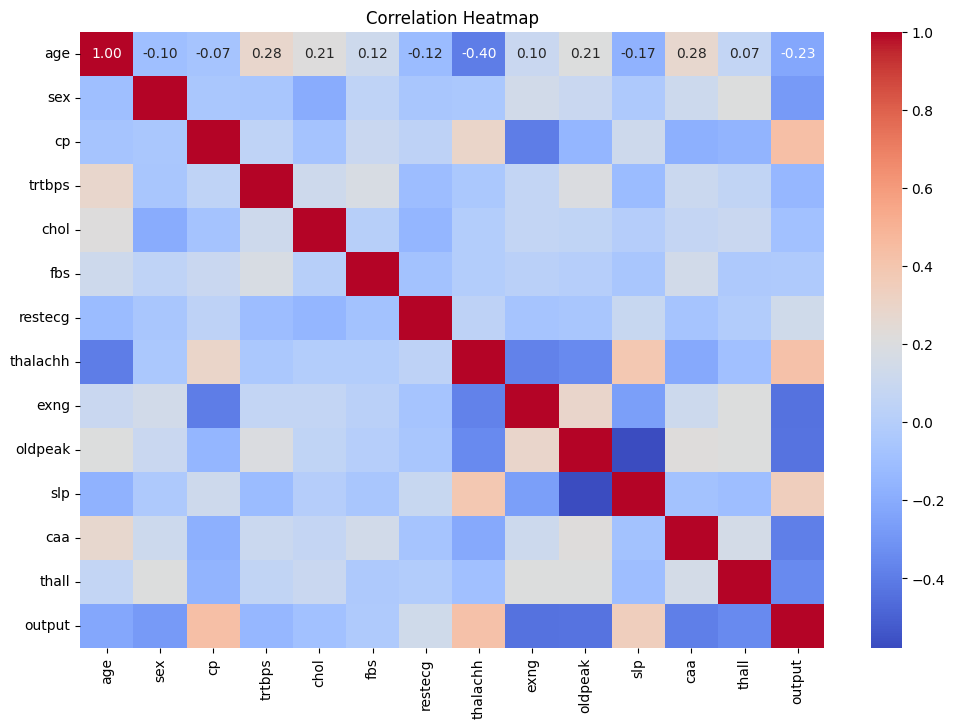

In [7]:
# Correlation Heatmap between the features
corr_matrix = heart_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Correlation Alaysis
- Age and Maximum Heart Rate (thalachh): Negative correlation (-0.40) indicates that as age increases, maximum heart rate tends to decrease.
- Sex and Heart Disease (output): Negative correlation (-0.28) suggests that females may have a lower likelihood of heart disease compared to males.
- Chest Pain Type (cp) and Heart Disease (output): Positive correlation (0.43) suggests that certain chest pain types may be associated with a higher likelihood of heart disease.
- Age and Resting Blood Pressure (trtbps): Positive correlation (0.28) implies that as age increases, resting blood pressure tends to increase.
- Age and Number of Major Vessels (caa): Positive correlation (0.28) indicates that older individuals may have more major vessels with potential blockages.
- Maximum Heart Rate (thalachh) and Heart Disease (output): Positive correlation (0.42) suggests that a higher maximum heart rate may be linked to heart disease.
- Exercise-Induced Angina (exng) and Heart Disease (output): Negative correlation (-0.44) implies that angina during exercise may be associated with a lower likelihood of heart disease.
- ST Depression (oldpeak) and Number of Major Vessels (caa): Strong negative correlation (-0.58) suggests that as ST depression increases, the number of major vessels tends to decrease.
- Number of Vessels (caa) and Thallium Stress Test (thall): Negative correlation (-0.39) indicates that as the number of major vessels increases, thallium stress test results tend to decrease.
- Chest Pain Type (cp) and Slope of the ST Segment (slp): Positive correlation (0.35) suggests a potential relationship between chest pain type and the slope of the ST segment.

In [8]:
# Remove output from features data
y = heart_df.output.values
X = heart_df.drop(columns="output").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(ha):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = ha.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=ha.Int('first_units',
        min_value=1,
        max_value=64,
        step=2), activation=activation, input_dim=13))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(ha.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=ha.Int('units_' + str(i),
            min_value=1,
            max_value=64,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [11]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [12]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [13]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 4,
 'units_0': 7,
 'units_1': 3,
 'units_2': 9,
 'units_3': 3,
 'units_4': 7,
 'units_5': 7,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [14]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 1s - loss: 0.6317 - accuracy: 0.7500 - 642ms/epoch - 214ms/step
Loss: 0.6317242980003357, Accuracy: 0.75


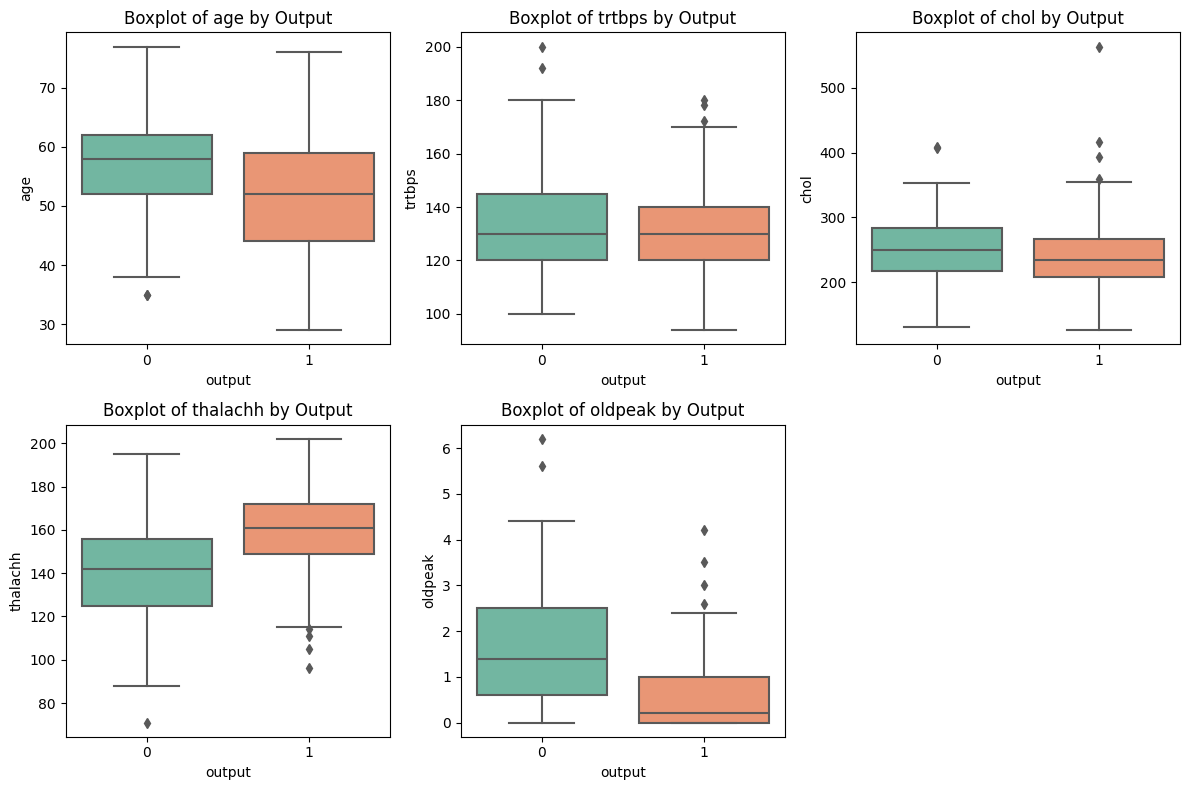

In [15]:
# Boxplot for Numeric Variables
numeric_variables = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
plt.figure(figsize=(12, 8))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_df, x="output", y=var, palette="Set2")
    plt.title(f"Boxplot of {var} by Output")
plt.tight_layout()
plt.show()

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall output  
0    0      1      1  
1    0      2      1  
2    0      2      1  
3    0      2      1  
4    0      2      1  


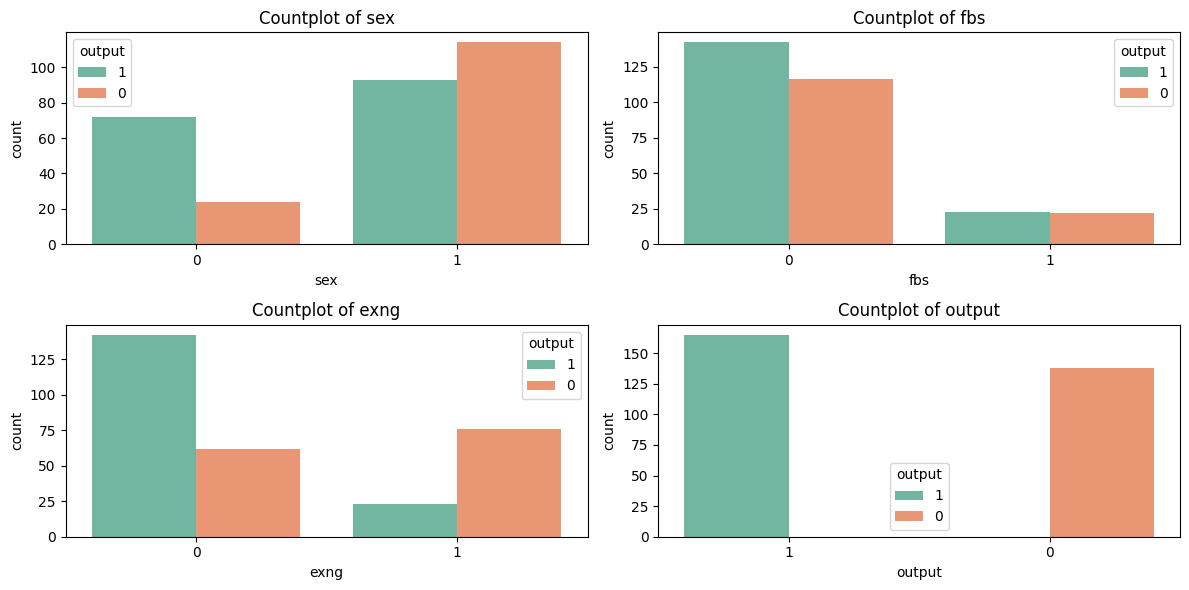

In [16]:
# Countplot for Binary Variables
# Convert the "output" column to a categorical data type
heart_df["output"] = heart_df["output"].astype(str)

# Explore the first few rows of the dataset
print(heart_df.head())

# Define binary variables
binary_variables = ["sex", "fbs", "exng", "output"]

# Create countplots for binary variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(binary_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=heart_df, x=var, hue="output", palette="Set2")
    plt.title(f"Countplot of {var}")
plt.tight_layout()
plt.show()
